# European Option Strategies

**Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction to Options

### What are Options?
Options are financial derivatives that give the buyer the right, but not the obligation, to buy or sell an underlying asset at a predetermined price (strike price) within a specified period (expiration date). The underlying asset can be stocks, indexes, commodities, or other financial instruments.

### Call Options vs. Put Options
- **Call Options**: Call options give the buyer the right to buy the underlying asset at the strike price. Call option holders benefit from a rising market, as they can purchase the asset at a lower price (strike price) and sell it at a higher market price.
- **Put Options**: Put options give the buyer the right to sell the underlying asset at the strike price. Put option holders benefit from a falling market, as they can sell the asset at a higher strike price and avoid potential losses in a declining market.

### Option Terminology
- **Premium**: The price paid by the option buyer to the option seller for obtaining the right. It represents the cost of the option.
- **Strike Price**: The predetermined price at which the underlying asset can be bought or sold.
- **Expiration Date**: The date when the option contract expires. After this date, the option is no longer valid.
- **In-the-Money (ITM)**: For a call option, when the market price is above the strike price. For a put option, when the market price is below the strike price.
- **Out-of-the-Money (OTM)**: For a call option, when the market price is below the strike price. For a put option, when the market price is above the strike price.
- **At-the-Money (ATM)**: When the market price is equal to the strike price.
- **Spot Price/Asset Price**: Price of the underlying asset.

# Basic Option Trading Strategies

1. Long Call
2. Long Put
3. Straddle/Strangle
3. Short Call
4. Short Put
5. Call Spreads
6. Put Spreads

We will introduce these trading strategies and understand them through visualization of their Profit and Loss Graphs. 


**Important Remarks Concerning Option Trading**

A knowledgeable and experienced trader can employ options to effectively modify a portfolio's risk, volatility, target profits, and Sharpe ratios in advantageous ways.

Option trading strategies, especially those that fall into the realm of **market making** strategies, are the bread and butter of many traders and propretary trading firms.

Inexperienced traders, or those influenced by greed or ill-advised counsel, can face detrimental consequences in when engaging in options trading.

## Long Call

A **long call** is a bullish option strategy where an investor buys a call option on a specific underlying asset. The buyer of the call option has the right, but not the obligation, to purchase the underlying asset at the strike price on or before the expiration date.

Key characteristics of a long call:
- **Objective**: Profit from an increase in the price of the underlying asset.
- **Risk**: Limited to the premium paid for the call option.
- **Breakeven Point**: The spot price at which the long call strategy becomes profitable.

**Breakeven Price for Long Call**

The breakeven price is the strike price plus the premium paid for the option.

In [3]:
def long_call_breakeven(strike_price, premium):
    breakeven_price = strike_price + premium
    return breakeven_price

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a, 0])

def long_call_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.maximum(spot_price - strike_price - premium, -premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='blue', lw=2, label = 'Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price + premium, color='red', ls='--', lw=2, label = 'Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Long Call Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    #plt.scatter(spot_price, - premium, color='red', marker='o', label='Initial Position')
    plt.show()


Breakeven Price: 47.5


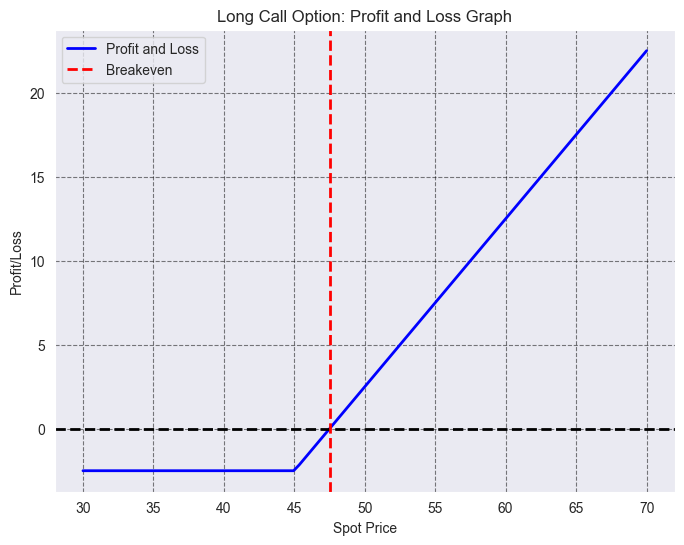

In [4]:
# Test the functions on the example
strike_price = 45.0
premium = 2.5

breakeven_price = long_call_breakeven(strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

spot_prices = np.linspace(30, 70, 100)
long_call_profit_loss_graph(spot_prices, strike_price, premium)

###  Long Put Strategy

A long put strategy involves buying put options with the expectation that the underlying asset's price will decrease. By purchasing a put option, the investor gains the right to sell the underlying asset at the strike price before the option's expiration. This strategy is typically used when an investor wants to provide downside protection against potential decline in owned assets, similar to purchasing an insurance policy on a car or house.

**Breakeven Price for Long Put**

It is the strike price minus the premium paid for the put option.


In [5]:
def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def long_put_breakeven(spot_price, strike_price, premium):
    breakeven_price = strike_price - premium
    return breakeven_price

def long_put_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.maximum(strike_price - spot_price - premium, -premium)
    
    plt.figure(figsize=(8, 6))
    plt.plot(spot_price, profit_loss, color='blue', lw=2, label = 'Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.axvline(strike_price - premium, color='red', ls='--', lw=2, label = 'Breakeven')  # Breakeven price
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Long Put Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()



Breakeven Price: 42.5


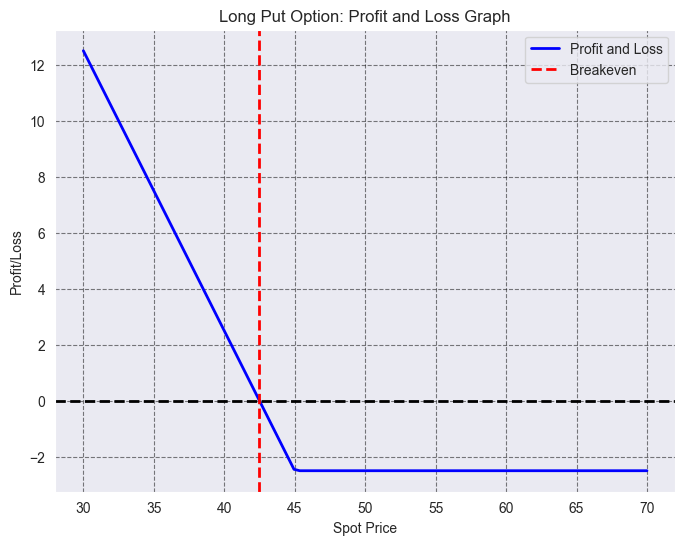

In [6]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5

breakeven_price = long_put_breakeven(spot_prices, strike_price, premium)
print(f"Breakeven Price: {breakeven_price}")

long_put_profit_loss_graph(spot_prices, strike_price, premium)

### Straddle/Strangle Option Strategy

The straddle option strategy is a neutral strategy that involves simultaneously purchasing both call options and put options on the same underlying asset with the same strike price and expiration date. A stradle option strategy involves purchasing a call and put option on the same underlying asset but different strike prices. This strategy is employed when the investor expects significant price volatility.

In [7]:

def put_value(spot_price, strike_price):
    a = strike_price - spot_price
    return np.max([a, 0])

def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a,0])

def straddle_option_value(spot_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    c = call_value(spot_price, strike_price_call)
    p = put_value(spot_price, strike_price_put)
    return num_calls*c + num_puts*p



def stradle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts):
    a = asset_price
    cs = strike_price_call
    cp = call_premium
    cn = num_calls
    ps = strike_price_put
    pp = put_premium
    pn = num_puts
    
    investment = cn*cp + pn*cp
    position_values = [straddle_option_value(Z, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts) for Z in spot_prices]
    profit_loss = np.array(position_values) - investment
    
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Stradle Option Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()

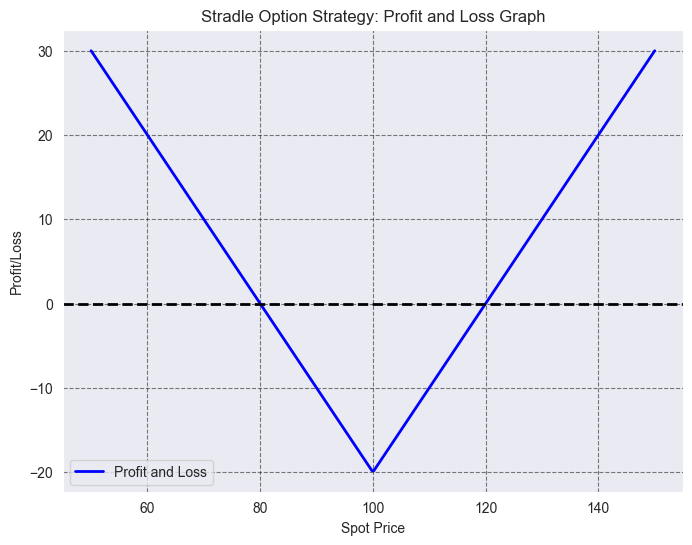

In [22]:
# Example usage

asset_price = 100
spot_prices = np.linspace(50, 150, 300)
num_calls = 1
strike_price_put = 100
strike_price_call = 100
num_puts = 1
call_premium = 10
put_premium = 10

stradle_option_profit_loss_graph(spot_prices, asset_price, strike_price_call, call_premium, num_calls, strike_price_put, put_premium, num_puts)

### Strategy 3: Short Call Option Strategy

A short call option strategy involves selling call options on an underlying asset that the investor does not own. The investor expects the price of the underlying asset to decline or remain below the strike price of the call option. By selling the call option, the investor receives a premium, which is the maximum potential profit for this strategy. However, the risk is unlimited, as the investor may have to sell the underlying asset at the strike price if the option buyer exercises the call option.

**Breakeven Price for Short Call**

The breakeven price for a short call option can be calculated using the following formula:

Breakeven Price = Strike Price + Premium Received

In [14]:
def short_call_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.minimum(strike_price - spot_price + premium, premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='green', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Short Call Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()

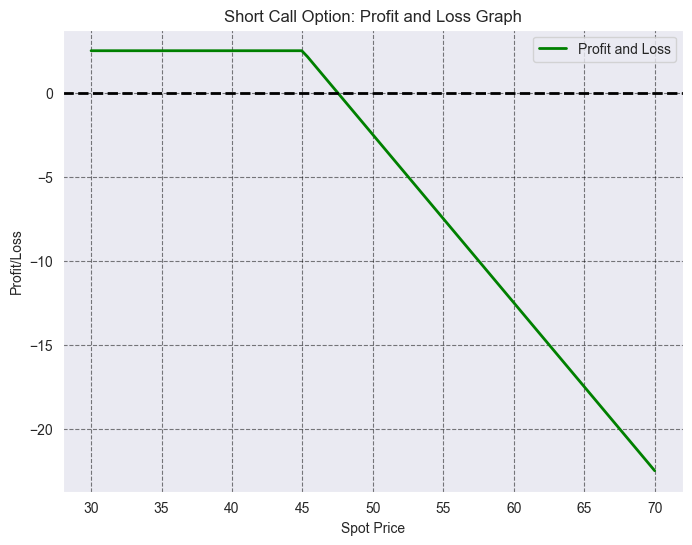

In [15]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5

short_call_profit_loss_graph(spot_prices, strike_price, premium)

### Strategy 4: Short Put Option Strategy

The short put is a basic option strategy where the investor sells a put option with the expectation that the underlying asset's price will either rise or remain relatively stable. In this strategy, the option seller (writer) receives a premium from the option buyer (holder) in exchange for taking on the obligation to buy the underlying asset at the strike price if the option is exercised.

**Purpose**

The purpose of the short put strategy is to generate income from the premium received by selling the put option. The seller expects the price of the underlying asset to stay above or move higher than the strike price during the option's lifetime. If the option expires worthless (out-of-the-money), the seller keeps the premium as profit. However, if the option is exercised (in-the-money), the seller will be obligated to buy the underlying asset at the strike price, which may lead to potential losses.

In [16]:
def short_put_profit_loss_graph(spot_price, strike_price, premium):
    profit_loss = np.minimum(spot_price - strike_price + premium, premium)
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines
    
    plt.plot(spot_price, profit_loss, color='orange', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Short Put Option: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()

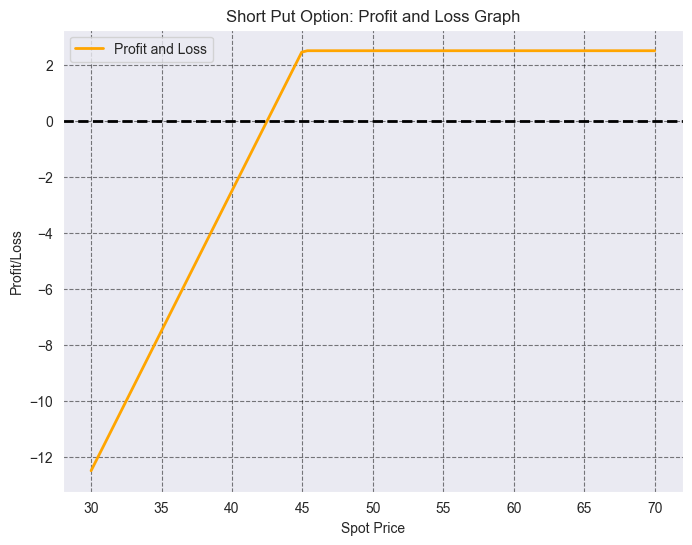

In [17]:
# Test the functions on the example
spot_prices = np.linspace(30, 70, 100)
strike_price = 45.0
premium = 2.5


short_put_profit_loss_graph(spot_prices, strike_price, premium)

### Call Option spreads

Call option spreads involves the simultaneous purchase and sale of two call options on the same underlying asset with the same expiration date but different strike prices.

**How Call Spreads work**

Bear/Market Making Strategy: Selling a lower strike priced call and reinvesting part of the premium into a higher strike call protects the investor from unlimited loss from the sold call.

Bull: Selling a higher strike priced call and buying a lower strike call allows the investor to profit from lower volatility.

Both strategies have the effect of limiting both profit and losses.

In [18]:
def call_value(spot_price, strike_price):
    a = spot_price - strike_price
    return np.max([a,0])

def spread_call_value(spot_price, strike_price_1, num_calls_1, strike_price_2, num_calls_2):
    c1 = call_value(spot_price, strike_price_1)
    c2 = call_value(spot_price, strike_price_2)
    return -num_calls_1*c1+num_calls_2*c2



def spread_call_profit_loss_graph(spot_prices, strike_price_1, num_calls_1, premium_1, strike_price_2, num_calls_2, premium_2):

    
    investment = num_calls_1*premium_1-num_calls_2*premium_2
    position_values = [spread_call_value(Z, strike_price_1, num_calls_1, strike_price_2, num_calls_2) for Z in spot_prices]
    profit_loss = np.array(position_values) + investment
    
    
    plt.figure(figsize=(8, 6))
    sns.set_style('dark')  # Set the dark theme with black grid
    sns.set_palette('tab10')  # Set a color palette for the lines

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)  # Breakeven line
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Call Spread Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)  # Set the grid color to black
    plt.legend()
    plt.show()
    

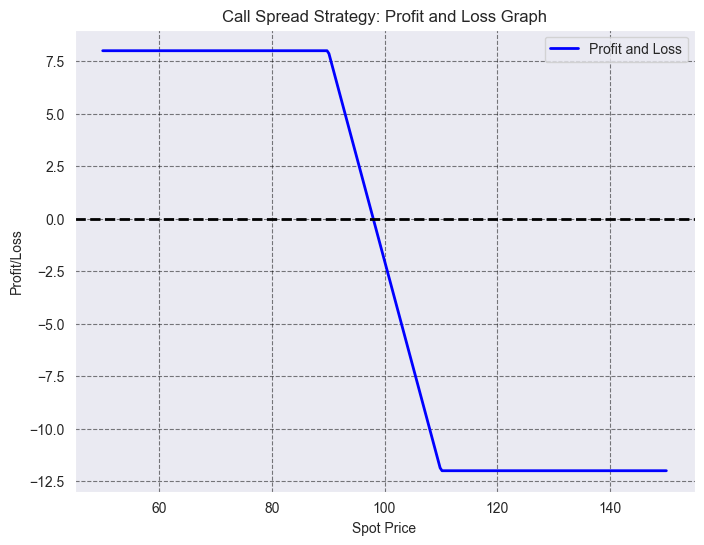

In [19]:
# Example usage
spot_prices = np.linspace(50, 150, 300)
strike_price_1 = 90
num_calls_1 = 1
premium_1 = 10
strike_price_2 = 110
num_calls_2 = 1
premium_2 = 2



spread_call_profit_loss_graph(spot_prices, strike_price_1, num_calls_1, premium_1, strike_price_2, num_calls_2, premium_2)

###  Put Spread Option Strategy

Put spreads are options strategies that involves the simultaneous purchase and sale of two put options on the same underlying asset with the same expiration date. 

**How Put Option Spreads Works**

Bear: Selling a higher strike priced put and reinvesting part of the premium into a lower strike put protects the investor from unlimited loss from the sold put.

Bull/Market Making Strategy: Selling a lower strike priced put and buying a higher strike put allows the investor to profit from lower volatility.

Both strategies have the effect of limiting both profit and losses.

In [20]:
def put_value(spot_price, strike_price):
    a = -spot_price + strike_price
    return np.max([a,0])

def spread_put_value(spot_price, strike_price_1, num_puts_1, strike_price_2, num_puts_2):
    p1 = put_value(spot_price, strike_price_1)
    p2 = put_value(spot_price, strike_price_2)
    return -num_puts_1*p1+num_puts_2*p2


def spread_put_profit_loss_graph(spot_prices, strike_price_1, num_puts_1, premium_1, strike_price_2, num_puts_2, premium_2):
    investment = num_puts_1 * premium_1 - num_puts_2 * premium_2
    position_values = [spread_put_value(Z, strike_price_1, num_puts_1, strike_price_2, num_puts_2) for Z in spot_prices]
    profit_loss = np.array(position_values) + investment

    plt.figure(figsize=(8, 6))
    sns.set_style('dark')
    sns.set_palette('tab10')

    plt.plot(spot_prices, profit_loss, color='blue', lw=2, label='Profit and Loss')
    plt.axhline(0, color='black', ls='--', lw=2)
    plt.xlabel('Spot Price')
    plt.ylabel('Profit/Loss')
    plt.title('Put Spread Strategy: Profit and Loss Graph')
    plt.grid(True, color='black', linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

    

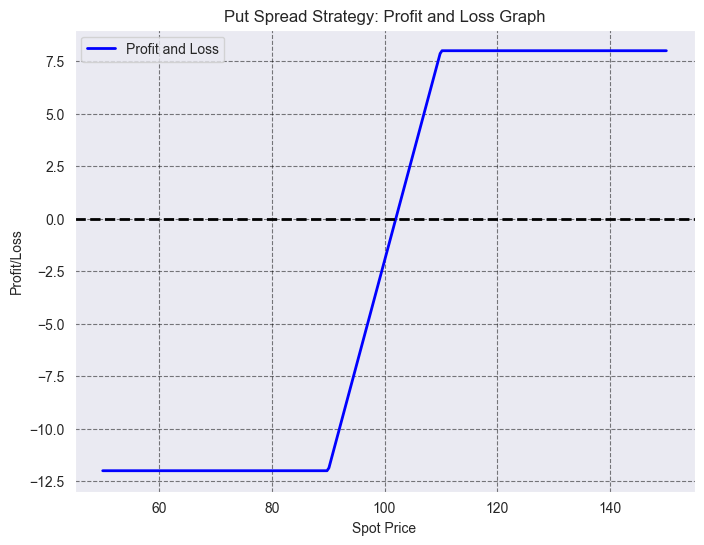

In [21]:
# Example usage
spot_prices = np.linspace(50, 150, 300)
strike_price_1 = 110
num_puts_1 = 1
premium_1 = 12
strike_price_2 = 90
num_puts_2 = 1
premium_2 = 4



spread_put_profit_loss_graph(spot_prices, strike_price_1, num_puts_1, premium_1, strike_price_2, num_puts_2, premium_2)